In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [5]:
# Load the dataset
data = pd.read_csv('carprices.csv')
data.head()


,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


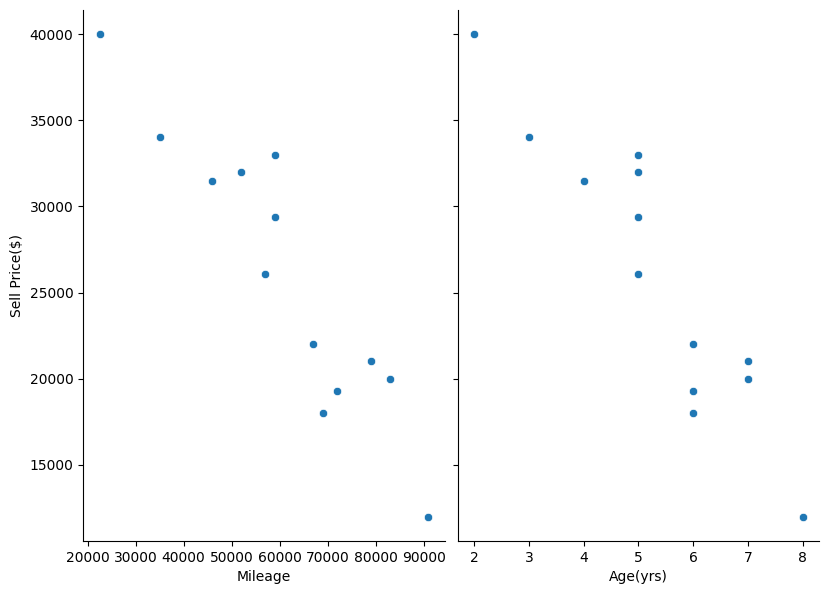

In [6]:
# Plot scatter plots to visualize relationships
sns.pairplot(data, x_vars=['Mileage', 'Age(yrs)'], y_vars='Sell Price($)', height=6, aspect=0.7)
plt.show()

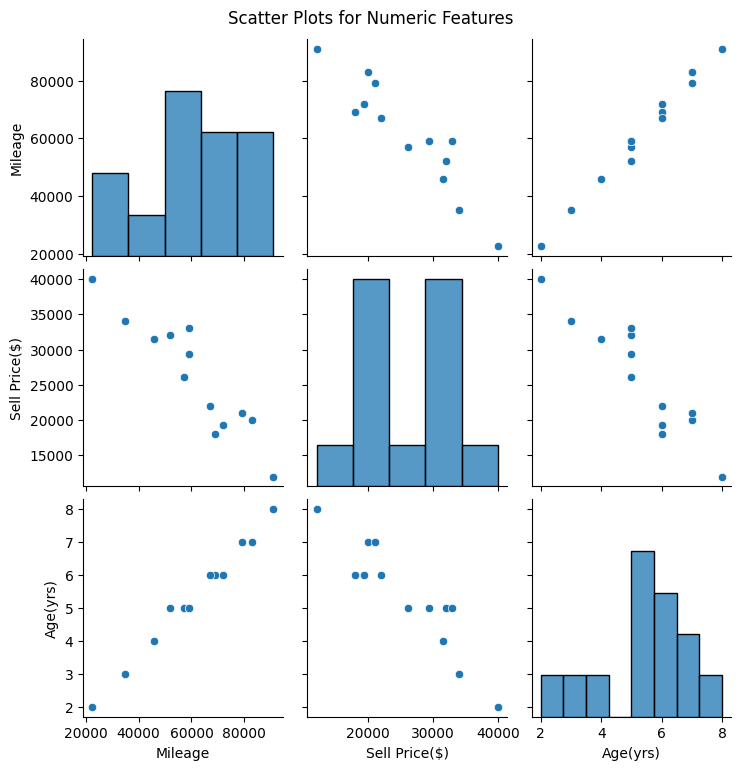

In [8]:
# Plot scatter plots for numeric variables only
sns.pairplot(df.drop(columns=["Car Model"]))
plt.suptitle("Scatter Plots for Numeric Features", y=1.02)
plt.show()

### Model building

In [10]:
# Define features and target
X = data[["Car Model", "Mileage", "Age(yrs)"]]
y = data["Sell Price($)"]

In [11]:
# Create a preprocessing pipeline with one-hot encoding for the Car Model
preprocessor = ColumnTransformer(
    transformers=[
        ('car_model', OneHotEncoder(drop='first'), ['Car Model'])
    ],
    remainder='passthrough'  # keep other columns (Mileage, Age) as they are
)

In [12]:
# Build a pipeline with preprocessing and regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [13]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Fit the model
model.fit(X_train, y_train)

c:\Users\ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('car_model',
                                                  OneHotEncoder(drop='first'),
                                                  ['Car Model'])])),
                ('regressor', LinearRegression())])

In [16]:
# Predict prices for given scenarios
predictions = model.predict(X_test)
predictions

array([23603.9620911 , 29389.24411936, 19249.3948386 ])

In [21]:
# Model performance
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

-6.2626001565508655

In [22]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions)

20980844.8967025

In [23]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predictions)

3747.5336830200054

In [24]:
# model accuracy on training data
model.score(X_train, y_train)

0.9770384435697266